In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
b= sns
sns.set_theme(style="whitegrid") 
color=sns.color_palette("husl", 6)


In [7]:
df= pd.read_csv('/content/drive/MyDrive/Data science/job_tests/Ai bees/comments_generator_data/news_post.csv' , encoding = "ISO-8859-1")

In [9]:
df.to_csv('news_post.csv')

In [ ]:
df.columns

Index(['username', 'date', 'time', 'company', 'category', 'post', 'comment'], dtype='object')

In [ ]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             397
entertainment    386
Name: category, dtype: int64

In [ ]:
df.shape

(2221, 7)

In [ ]:
df.tail()

,username,date,time,company,category,post,comment
2216,GeekosityMag,5/28/2010,10:21:13,google,tech,Internet search engine users are an odd mix o...,Savvy searchers fail to spot ads
2217,yoncevadia,5/28/2010,16:31:09,google,tech,Internet TV has been talked about since the s...,TV's future down the phone line
2218,sharainsaw,5/28/2010,16:02:15,google,tech,Thousands of products and tens of thousands o...,Cebit fever takes over Hanover
2219,thorsragnar0k,5/25/2010,17:29:00,facebook,tech,Making games for future consoles will require...,New consoles promise big problems
2220,1970STARKS,5/27/2010,11:56:19,facebook,tech,BT is introducing two initiatives to help bea...,BT program to beat dialler scams


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2221 non-null   object
 1   date      2221 non-null   object
 2   time      2221 non-null   object
 3   company   2221 non-null   object
 4   category  2221 non-null   object
 5   post      2221 non-null   object
 6   comment   2221 non-null   object
dtypes: object(7)
memory usage: 121.6+ KB


In [ ]:
df.isnull().sum()

username    0
date        0
time        0
company     0
category    0
post        0
comment     0
dtype: int64

In [ ]:
#df=df.drop_duplicates()

In [ ]:
#df=df.drop(['filename', 'location_id', 'page_url', 'area', 'area_marla', 'locality', 'agency', 'agent'],axis=1)

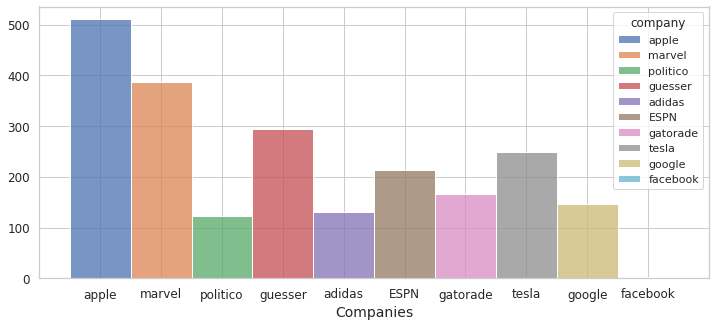

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
b = sns.histplot(x='company',data=df,ax=ax,hue="company",multiple='stack')
b.axes.set_title("",fontsize=24)
b.set_xlabel("Companies",fontsize=14)
b.set_ylabel("",fontsize=14)
b.tick_params(labelsize=12)


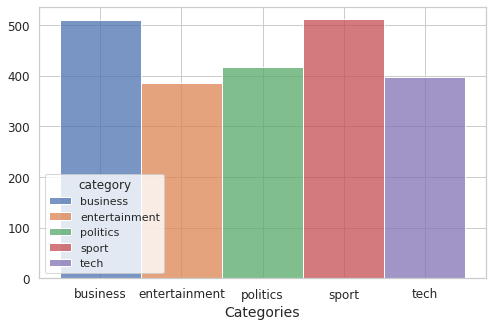

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
b = sns.histplot(x='category',data=df,ax=ax,hue="category",multiple='stack')
b.axes.set_title("",fontsize=24)
b.set_xlabel("Categories",fontsize=14)
b.set_ylabel("",fontsize=14)
b.tick_params(labelsize=12)


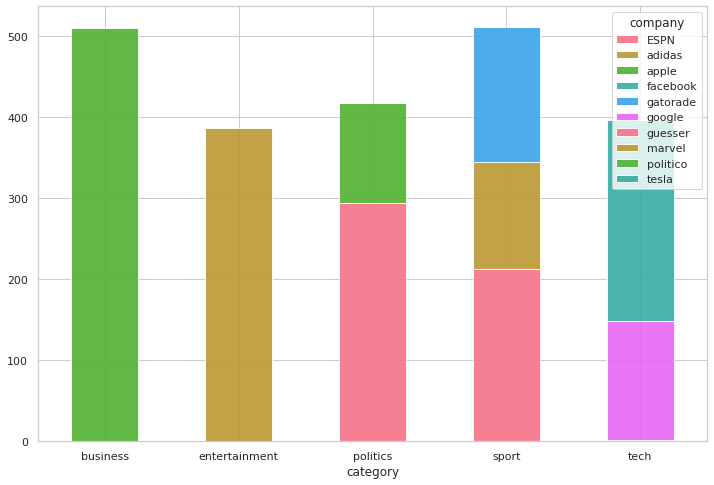

In [ ]:
pd.crosstab(index = df["category"],columns = df["company"]).plot(kind='bar',
                figsize=(12, 8),alpha=0.9,rot=0,stacked=True,title="", color=color)

6.0
4.0


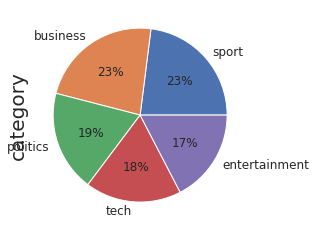

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plt.rcParams.update({'font.size': 22})
plt.ylabel('',fontsize=20)
plot_size[0] = 10
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 
df.category.value_counts().plot(kind='pie', autopct='%1.0f%%',textprops={'fontsize': 12})

# As you see above, category class is imblanced and it will be caused of overfitting or true prediction but actually false. I have to try resampling technique. 

In [ ]:
x = df[['category']]
y =df[['category']]

# Undersampling would be an ideal for my dataset instead of oversampling reason expension of rows and then we need to expand rest of classes rows.

In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_rus.shape,y_rus.shape

((1930, 1), (1930, 1))

Converting into dataframe so i could assign it to original dataset category column

In [ ]:
dfx= pd.DataFrame(  x_rus)
dfx.shape

(1930, 1)

In [ ]:
dfx.value_counts()

tech             386
sport            386
politics         386
entertainment    386
business         386
dtype: int64

after randome undersampling news rows are 1930, so assigning the x_rus dataframe rows and x_rus must be same.

In [ ]:
df= df.iloc[0:1930]

In [ ]:
df.shape

(1930, 7)

In [ ]:
df['category']= x_rus

10.0
8.0


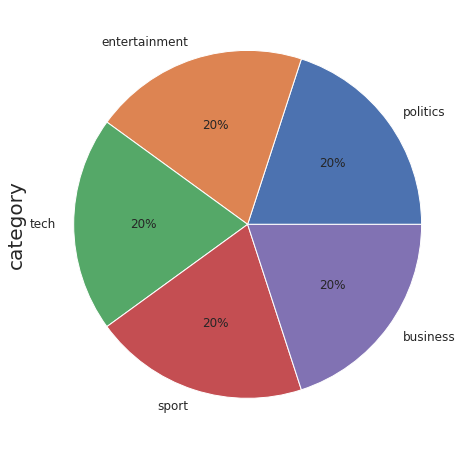

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plt.rcParams.update({'font.size': 22})
plt.ylabel('',fontsize=20)
plot_size[0] = 10
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 
df.category.value_counts().plot(kind='pie', autopct='%1.0f%%',textprops={'fontsize': 12})

# Now as you can see dataset class category is perfectly blanced.

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
import string

punct = string.punctuation
stopwords =list(STOP_WORDS)
def data_cleaning(sentence):
    doc = nlp(sentence)
    tokens =[]
    for token in doc:
        if token .lemma_ !="-PRON-":
            temp= token.lemma_.lower().strip()
        else: 
            temp= token.lower_
        tokens.append(temp)
    clean_tokens = []
    for token in tokens:
        if token not in stopwords and token not in  punct:
            clean_tokens.append(token)
    return clean_tokens

# implemntation of multiclass multioutput classification

In [ ]:
tfidf = TfidfVectorizer(tokenizer= data_cleaning)
tfidfc = TfidfVectorizer(tokenizer= data_cleaning)
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
svc = SVC()
svcc = SVC()
#model = MultiOutputClassifier(estimator=svc)
#print(model)

In [ ]:
#modelr = MultiOutputRegressor(GradientBoostingRegressor())

In [ ]:
x = df['post']
y = df['category']#,'comment']]
x.shape,y.shape

((1930,), (1930,))

In [ ]:
xc = df['category']
yc = df['comment']#,'comment']]
x.shape,y.shape

((1930,), (1930,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape,y_train.shape,y_test.shape



((1544,), (386,), (1544,), (386,))

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(xc, yc, test_size=0.2, random_state=42)
X_trainc.shape , X_testc.shape,y_trainc.shape,y_testc.shape



((1544,), (386,), (1544,), (386,))

In [ ]:
clf= Pipeline([('tfidf',tfidf),('clf',svc)])

In [ ]:
clfc= Pipeline([('tfidf',tfidfc),('clf',svcc)])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x7f6b345cd950>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0

In [ ]:
clfc.fit(X_trainc,y_trainc)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x7f6b345cd950>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0

In [ ]:
y_pred = clf.predict(X_test)
y_predc = clfc.predict(X_testc)

In [ ]:
svc_acc = round(clf.score(X_test,y_test)*100,2)
print('Text generator accuracy :',svc_acc,'%')
svcc_acc = round(clfc.score(X_testc,y_testc)*100,2)
print('Text generator accuracy :',svcc_acc,'%')

Text generator accuracy : 75.65 %
Text generator accuracy : 0.0 %


accuracy of text generation of comments is worst because of classification algorithm and curse of dimensionality. yes for category text generation where onlye five values or feature to predict it performance well due to less less dimension

In [ ]:
print(clf.predict(["The boss of budget airline Ryanair has warned holiday prices are likely to rise sharply next year as consumer demand for travel rebounds."]))

['business']


In [ ]:
print(clfc.predict(["business"]))

['Singapore growth at 8.1% in 2004']
